# Loading and clearing of news data

In [58]:
import pandas as pd  # Importing the Pandas library for data manipulation

# Reading data from 'jyllands_posten_data.csv' into a DataFrame for further processing
df = pd.read_csv('DATA/jyllands_posten_data.csv')

# Displaying the initial few rows of the dataset to get an overview of the data structure and content
df.head()  


,Term,Date,Headline,Category
0,havstigninger,2011-01-02,Husejere vil kende klima-risiko,Bolig
1,klimaforandringer,2011-01-03,295.000 dræbt af naturen i 2010,International
2,havstigninger,2011-01-03,Klar besked om klimarisiko,JP Erhverv
3,CO2-udledning,2011-01-04,Danmarks grønne industri visner,JP Erhverv
4,klimaforandringer,2011-01-04,Kinas ørkner vil bestå i 300 år,Viden


In [59]:
# Converting the 'Date' column to a standardized datetime format for consistent data manipulation
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Extracting the year and month from the 'Date' column to a new 'month' column 
# This helps in aligning with the weather data based on a monthly granularity
df['month'] = df['Date'].dt.strftime('%Y-%m')

# Displaying the last few rows of the dataset to visually inspect and confirm the applied changes
df.tail()


,Term,Date,Headline,Category,month
14265,CO2-reduktion,2023-08-21,Forslag: Beboerparkering skal kun være til elb...,JP Aarhus,2023-08
14266,klimaforandringer,2023-08-21,Nyt erhvervseventyr: Udspil ses som nøglen til...,JP Erhverv,2023-08
14267,CO2-udledning,2023-08-21,Glem bilen: Aarhus bliver bilfri – nogle steder,JP Aarhus,2023-08
14268,CO2-mål,2023-08-21,Forslag: Beboerparkering skal kun være til elb...,JP Aarhus,2023-08
14269,klimaforandringer,2023-08-22,Græske brandmænd har fundet 18 lig i skovbrand...,Ritzau telegrammer,2023-08


In [60]:
# Identifying duplicate rows based on all columns except for 'Term' and 'Category'
# The `duplicated` function returns a boolean series which is True for every row which is a duplicate
duplicates = df[df.duplicated(subset=df.columns.difference(['Term', 'Category']), keep=False)]

# Displaying the identified duplicate rows for inspection, sorted by 'Date', 'Headline', and then other relevant columns
duplicates.sort_values(by=['Date', 'Headline'])

# Counting the total number of duplicated rows based on the specified columns
num_duplicates = df.duplicated(subset=df.columns.difference(['Term', 'Category'])).sum()

# Displaying the number of identified duplicated rows for clarity
print(f"Number of duplicated rows: {num_duplicates}")

# Dropping the duplicated rows from the main DataFrame. Using 'keep=first' ensures we retain one instance of the duplicate
df = df.drop_duplicates(subset=df.columns.difference(['Term', 'Category']), keep='first')

# Informing the user about the number of duplicates that were removed from the main dataset
print(f"{num_duplicates} rows have been removed.")


Number of duplicated rows: 4526
4526 rows have been removed.


### Counting the number of articles for each date/month and merging this count with the main DataFrame (for weather data alignment)

In [61]:
# The merging operation adds an 'article count' column to the main DataFrame, representing the count of articles for each date/month
df = df.merge(df.groupby('Date').size().reset_index(name='article count'), on='Date')

In [62]:
# Remove unnecessary columns to retain only the "Date", "month" (for weather data sync) and "article count" columns
df = df.drop(columns=['Term', 'Headline', 'Category']).drop_duplicates()

# Drop entries with a date after 2023-08-14 to match the weather data
df = df[df['Date'] <= '2023-08-14']

df

,Date,month,article count
0,2011-01-02,2011-01,1
1,2011-01-03,2011-01,2
3,2011-01-04,2011-01,2
5,2011-01-05,2011-01,2
7,2011-01-06,2011-01,2
...,...,...,...
9701,2023-08-10,2023-08,2
9703,2023-08-11,2023-08,5
9708,2023-08-12,2023-08,3
9711,2023-08-13,2023-08,2


In [63]:
# Saving the cleaned DataFrame `df` to a new CSV file named "News_data.csv".
df.to_csv('DATA/News_data.csv', index=False)

# Printing a confirmation message to indicate the successful saving of the data.
print("Data successfully saved to 'News_data.csv'")


Data successfully saved to 'News_data.csv'


## Simple Visualization of the data

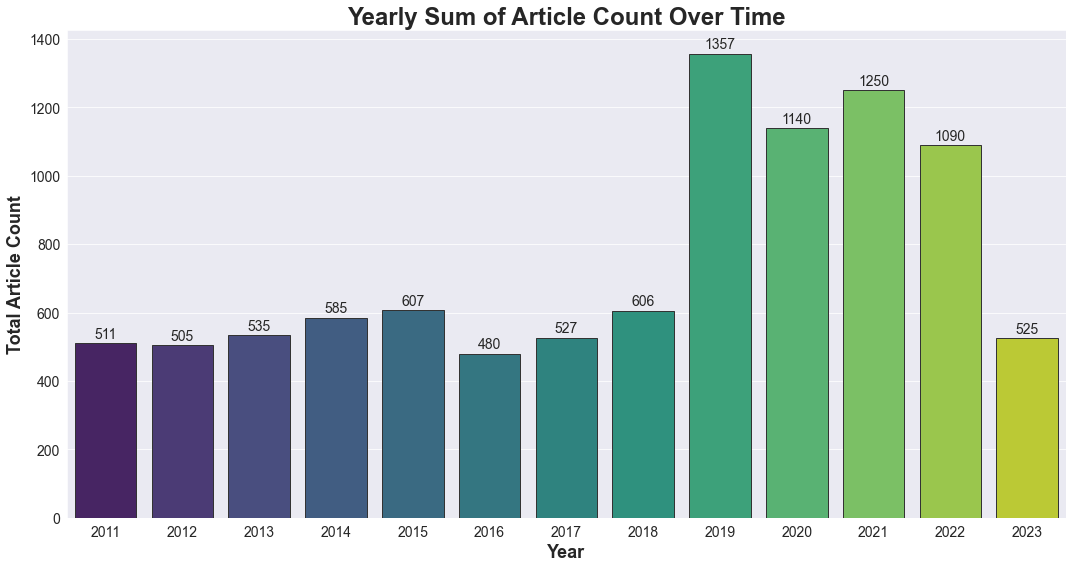

In [64]:
# Importing necessary libraries for data visualization and data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract the year from the 'Date' column
df['year'] = pd.to_datetime(df['Date']).dt.year

# Aggregating the sum of 'article count' for each unique year
year_aggregated = df.groupby('year').agg({'article count': 'sum'}).reset_index()

# Setting up the visual style of the plot using seaborn
sns.set_style("darkgrid")
sns.set_palette("viridis")

# Defining the figure size for the plot
plt.figure(figsize=(15, 8))

# Plotting the aggregated data with 'year' on the x-axis and aggregated 'article count' on the y-axis
barplot = sns.barplot(x='year', y='article count', data=year_aggregated, palette="viridis", edgecolor=".2")

# Adding a title to the plot
plt.title('Yearly Sum of Article Count Over Time', fontsize=24, fontweight='bold')

# Labeling the x and y axes
plt.xlabel('Year', fontsize=18, fontweight='bold')
plt.ylabel('Total Article Count', fontsize=18, fontweight='bold')

# Adjusting the font size of the tick marks on the axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add annotations to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize = 14)

# Ensuring the layout is tight and neat
plt.tight_layout()

# Displaying the plot to the screen
plt.show()
